Title: 


Introduction:
* Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
* Clearly state the question you will try to answer with your project
* Identify and describe the dataset that will be used to answer the question


Preliminary exploratory data analysis:
* Demonstrate that the dataset can be read from the web into R 
* Clean and wrangle your data into a tidy format
* Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
* Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.


Methods:
* Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
* Describe at least one way that you will visualize the results


Expected outcomes and significance:
* What do you expect to find?
* What impact could such findings have?
* What future questions could this lead to?

# Relationship between Features of Wine and Quality Rating

### Introduction

Quality assessment of red wines requires an evaluation by a professional sommelier, which is a time-consuming and costly process. Sommeliers may have different conceptual understandings of wine and their opinions may vary widely among themselves. However, another way we can determine the quality of red wines is by non-conceptual assessment based on laboratory testing. 

Scientists can predict human wine taste preferences by using a data mining approach based on easily available analytical tests at the certification step. A computationally efficient procedure performed simultaneous variable and model selection. Oenologist can easily evaluate wine testing and improve wine production by using the model. In addition, the approach can help in target marketing by modeling consumer tastes. We expect to find the relationship between certain details of wines and the quality level of the wines. In other words, some of the features of wines in the data set will be used as predictor variables for the class variable quality. The following are some potential predictor variables:

* fixed acidity 
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* ph
* sulphates
* alcohol


## Preliminary exploratory data analysis

For relevant documentation and details of dataset, reference [documentation](https://doi.org/10.1016/j.dss.2009.05.016).

### Units of data

|Variable|Units|
|--|--|
|Fixed acidity|g<sub>(tartaric acid)</sub>/dm<sup>3</sup>|
|Volatile acidity|g<sub>(acetic acid)</sub>/dm<sup>3</sup>|
|Citric acid|g/dm<sup>3</sup>|
|Residual sugar|g/dm<sup>3</sup>|
|Chlorides|g<sub>(sodium chloride)</sub>/dm<sup>3</sup>|
|Free sulfur dioxide|mg/dm<sup>3</sup>
|Total sulfur dioxide|mg/dm<sup>3</sup>|
|Density|g/cm<sup>3</sup>
|pH|0-14 pH scale|
|Sulphates|g<sub>(potassium sulphate)</sub>/dm<sup>3</sup>|
|Alcohol|vol. %|
|Quality|0-10 scale|

<br>

##### The preliminary exploratory data analysis will include:
- Reading dataset from web link
- Cleaning and wrangling data into a tidy format
- Splitting into training data and test data
- Statistics of training subset
- Visualizing training data comparing distributions of predictor variables

In [116]:
# load necessary libraries
library(tidyverse)
library(tidymodels)

#### Reading from web link
Linking the CSV file from the UCI machine learning repository, the red wine data can be read directly into R with the appropriate delimiter. For this case, the delimiter is `';'` but the decimal point is `'.'` so `read_csv2` will not work in this case and `read_delim` should be used with `';'` as the delimiter argument.

In [ ]:
# read data frame from UCI machine learning database
red_wine_link <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
red_wine_data <- read_delim(red_wine_link, ';')

#### Cleaning and Wrangling
After the data is read, the variable names are renamed to appropriate names, as the original contains spaces, which would complicate the wrangling process otherwise.

Additionally, the quality variable is converted to a factor type, as it should be discrete categorical variable that classifies each sample of wine.

In [124]:
# rename column names for easier reference
colnames(red_wine_data) <- c("fixed_acidity", "volatile_acidity", "citric_acid", 
                             "residual_sugar", "chlorides", "free_so2", "total_so2",
                             "density", "ph", "sulphates", "alcohol", "quality")

# convert quality to factor type
red_wine_data <- mutate(red_wine_data, quality = as_factor(quality))

head(red_wine_data)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,ph,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


#### Splitting
Splitting the data involves some form of randomness, thus a seed is set so that the results and calculations are consistently reproducible. This prevents information from changing when code is run at different times or different machines.

The constant `SPLIT_PROPORTION` is defined and will determine the proportion of the training data subset from the entire dataset. The strata is defined to be the variable `quality` so that there is roughly an equal proportion of each `quality` value in both data subset.

In [125]:
# set seed for consistency
set.seed(8888)

# splitting data set into training and testing subsets
SPLIT_PROPORTION = 0.75
red_split_data <- initial_split(red_wine_data, prop = SPLIT_PROPORTION, strata = quality)

red_training_data <- training(red_split_data)
red_testing_data <- testing(red_split_data)

# count the number of observations in each subset
paste("Number of observations in training data subset: ", pull(count(red_training_data)))
paste("Number of observations in testing data subset: ", pull(count(red_testing_data)))

[1] "Number of observations in training data subset:  1198"

[1] "Number of observations in testing data subset:  401"

#### Statistics of training data subset
Next, the statistics and other summary details of the training data is found as an overview / preliminary exploratory analysis of the data.
The first part is checking for `null` and `N/A` values. Checking for both types of invalid values ensures that neither `null` or `N/A` is considered valid values.
The second part is finding the summary statistics of the training data set, which R has a conveninent built-in function `summary`. However, it is difficult to read from the output, so selective statistics are calculated for each variable in their respective rows. 

<sub>Note: this is merely a visual representation of the training data statistics, thus the rules of tidy data does not apply.</sub>

In [126]:
# check for null/na data
paste("Number of null values: ", sum(map_df(red_training_data, is.null)))
paste("Number of N/A values: ", sum(map_df(red_training_data, is.na)))

# produce summary statistics of the training data
#summary(red_training_data)

# creating an abstract function for the sake of reducing repetitive code, acts as a "code template"
red_map <- function(fn) {
    red_training_data |>
    # remove quality, as it is decided to be the class variable and is now categorical
    select(-quality) |>
    # apply function from parameter into map function
    map_df(fn) |>
    # pivot for better view
    pivot_longer(cols = fixed_acidity:alcohol, values_to = as.character(substitute(fn)), names_to = "variable")
}

# example of what the function does when red_map(mean) is called
# red_training_mean <- red_training_data |>
#     select(-quality) |>
#     map_df(mean) |>
#     pivot_longer(cols = fixed_acidity:alcohol, values_to = "mean", names_to = "variable")

# bind all statistics together, but remove the variable column from all but first
bind_cols(red_map(min), select(red_map(mean), mean), select(red_map(max), max), select(red_map(sd), sd))

[1] "Number of null values:  0"

[1] "Number of N/A values:  0"

variable,min,mean,max,sd
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
fixed_acidity,4.60000,8.34849750,15.90000,1.766492235
volatile_acidity,0.12000,0.52679048,1.58000,0.180477609
citric_acid,0.00000,0.27278798,1.00000,0.196989218
residual_sugar,0.90000,2.53914858,15.50000,1.382344494
chlorides,0.01200,0.08800751,0.61100,0.048661885
free_so2,1.00000,15.90734558,72.00000,10.408479102
total_so2,6.00000,46.32721202,289.00000,32.831144831
density,0.99007,0.99676214,1.00315,0.001865492
ph,2.74000,3.30863105,3.90000,0.151822003


As seen above, there does not appear to be any invalid values of any variable in all the observations, thus further wrangling is not necessary in this stage of the analysis. However, looking at the max values of the predictor variables with the respective mean values, it can be inferred that some predictor variables contain outliers; most notably, the `total_so2` variable, representing the total sulfur dioxide content in the wine, has an average of ~15.9mg/dm<sup>3</sup> but a max of ~289mg/dm<sup>3</sup>, which can be considered an outlier especially since the max is ~7.4 standard deviations from the mean.

These outliers will significantly affect the next part, visualization, as the outliers will extend the x-axis and result in an ineffective visualization as it is difficult to view the actual plot.

#### Visualization of training data subset

The last part of the preliminary exploratory data analysis involves visualizing the training data in plots relevant to the objective of this analysis. The first plot is a distribution of the `quality` class variable.

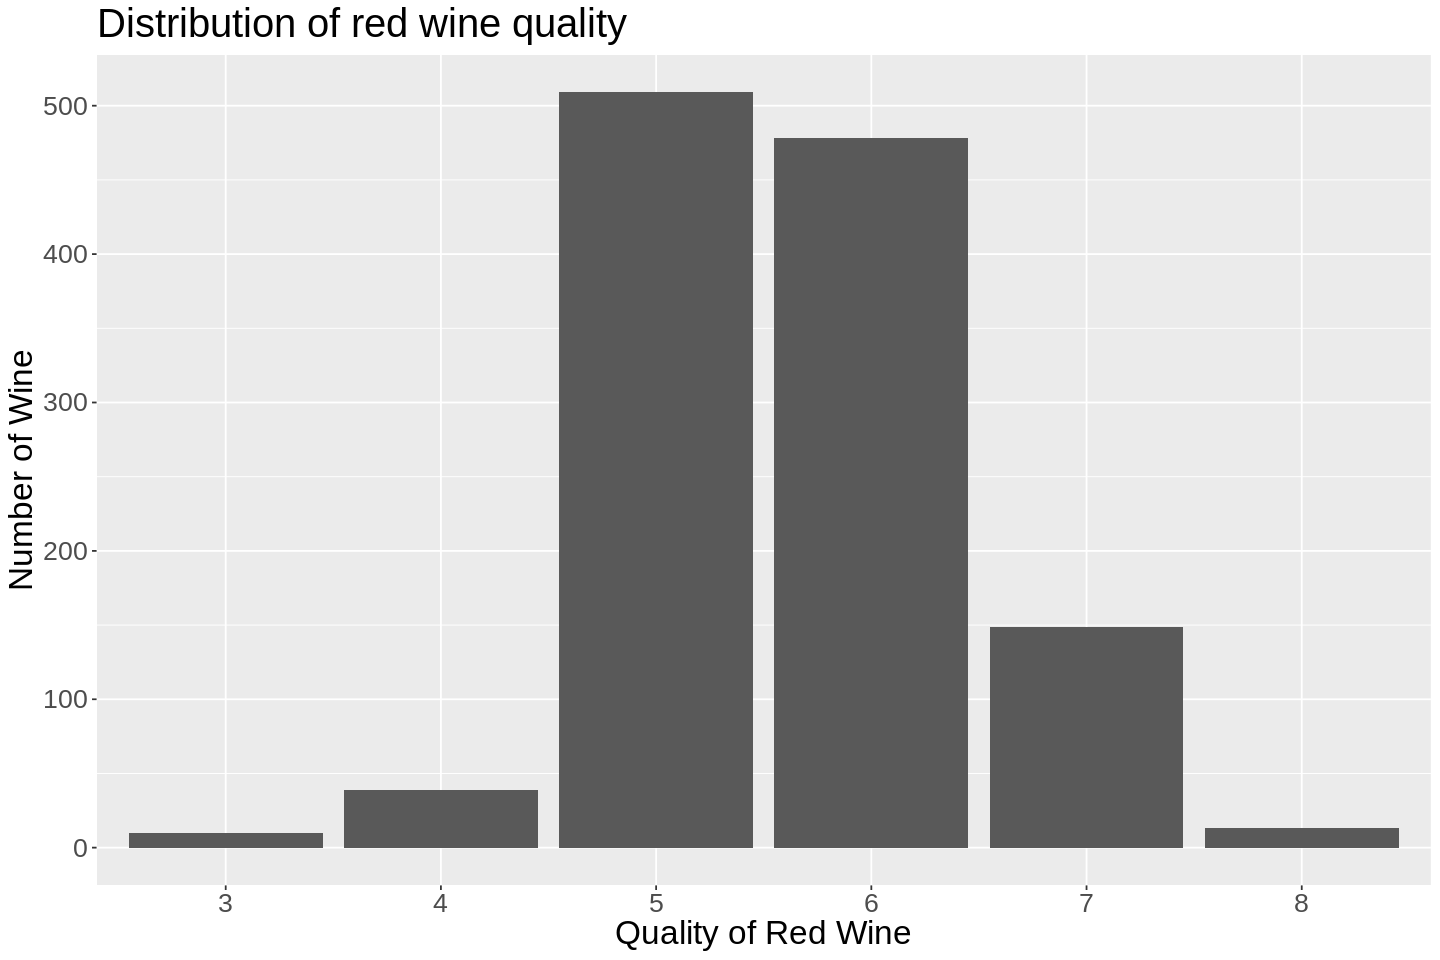

In [127]:
options(repr.plot.width = 12, repr.plot.height = 8)

#plotting the distribution of red wine quality
red_quality_bar <- ggplot(red_training_data, aes(x = quality)) +
    geom_bar() +
    labs(x = "Quality of Red Wine", y = "Number of Wine") + 
    ggtitle("Distribution of red wine quality") +
    theme(text = element_text(size = 20))

red_quality_bar

From the plot above, it can be seen that the `quality` variable is somewhat normally distributed. With this observation and given that the `quality` variable has possible values from 0 to 10 (from documentation), it's not surprising to find that the mean and median is around the center of the range, which is around 5. However, it is notable that in the testing data, the range is from 3 to 8 and not 0 to 10. This would indicate that the proportion of very poor or excellent quality wine in a overall population is very small. 

However, it is important to note that the quality is determined by human blind tastes and can be considered subjective, as there aren't explicit standards/basis on how the wines are graded from the documenation. Due to this subjectivity, random error may be more prominent and noticeable during analyses.

Second plot is comparing the distribution of the potential predictor variables. However, seen from the statistics, the range, min, and max differ greatly between variables, thus the values should be normalized to appropriately compare. This is done by normalizing each predictor variable respectively with the `scale()` function and then pivoting them so that they can be plotted as a histogram using `facet_wrap()` for an effective visualization to compare distributions. `scale()` calculates each predictor variable's own respective mean and standard deviation and normalizes the values, allowing for normalized distributions.

Additionally, values outside of 3 standard deviations will be excluded from the plot, as values outside of 3 standard deviations are considered outliers and statistically improbable. The exclusion of outliers will improve the visualization of the distributions of the predictor variables and will not be a significant detriment to the overall preliminary exploratory data analysis

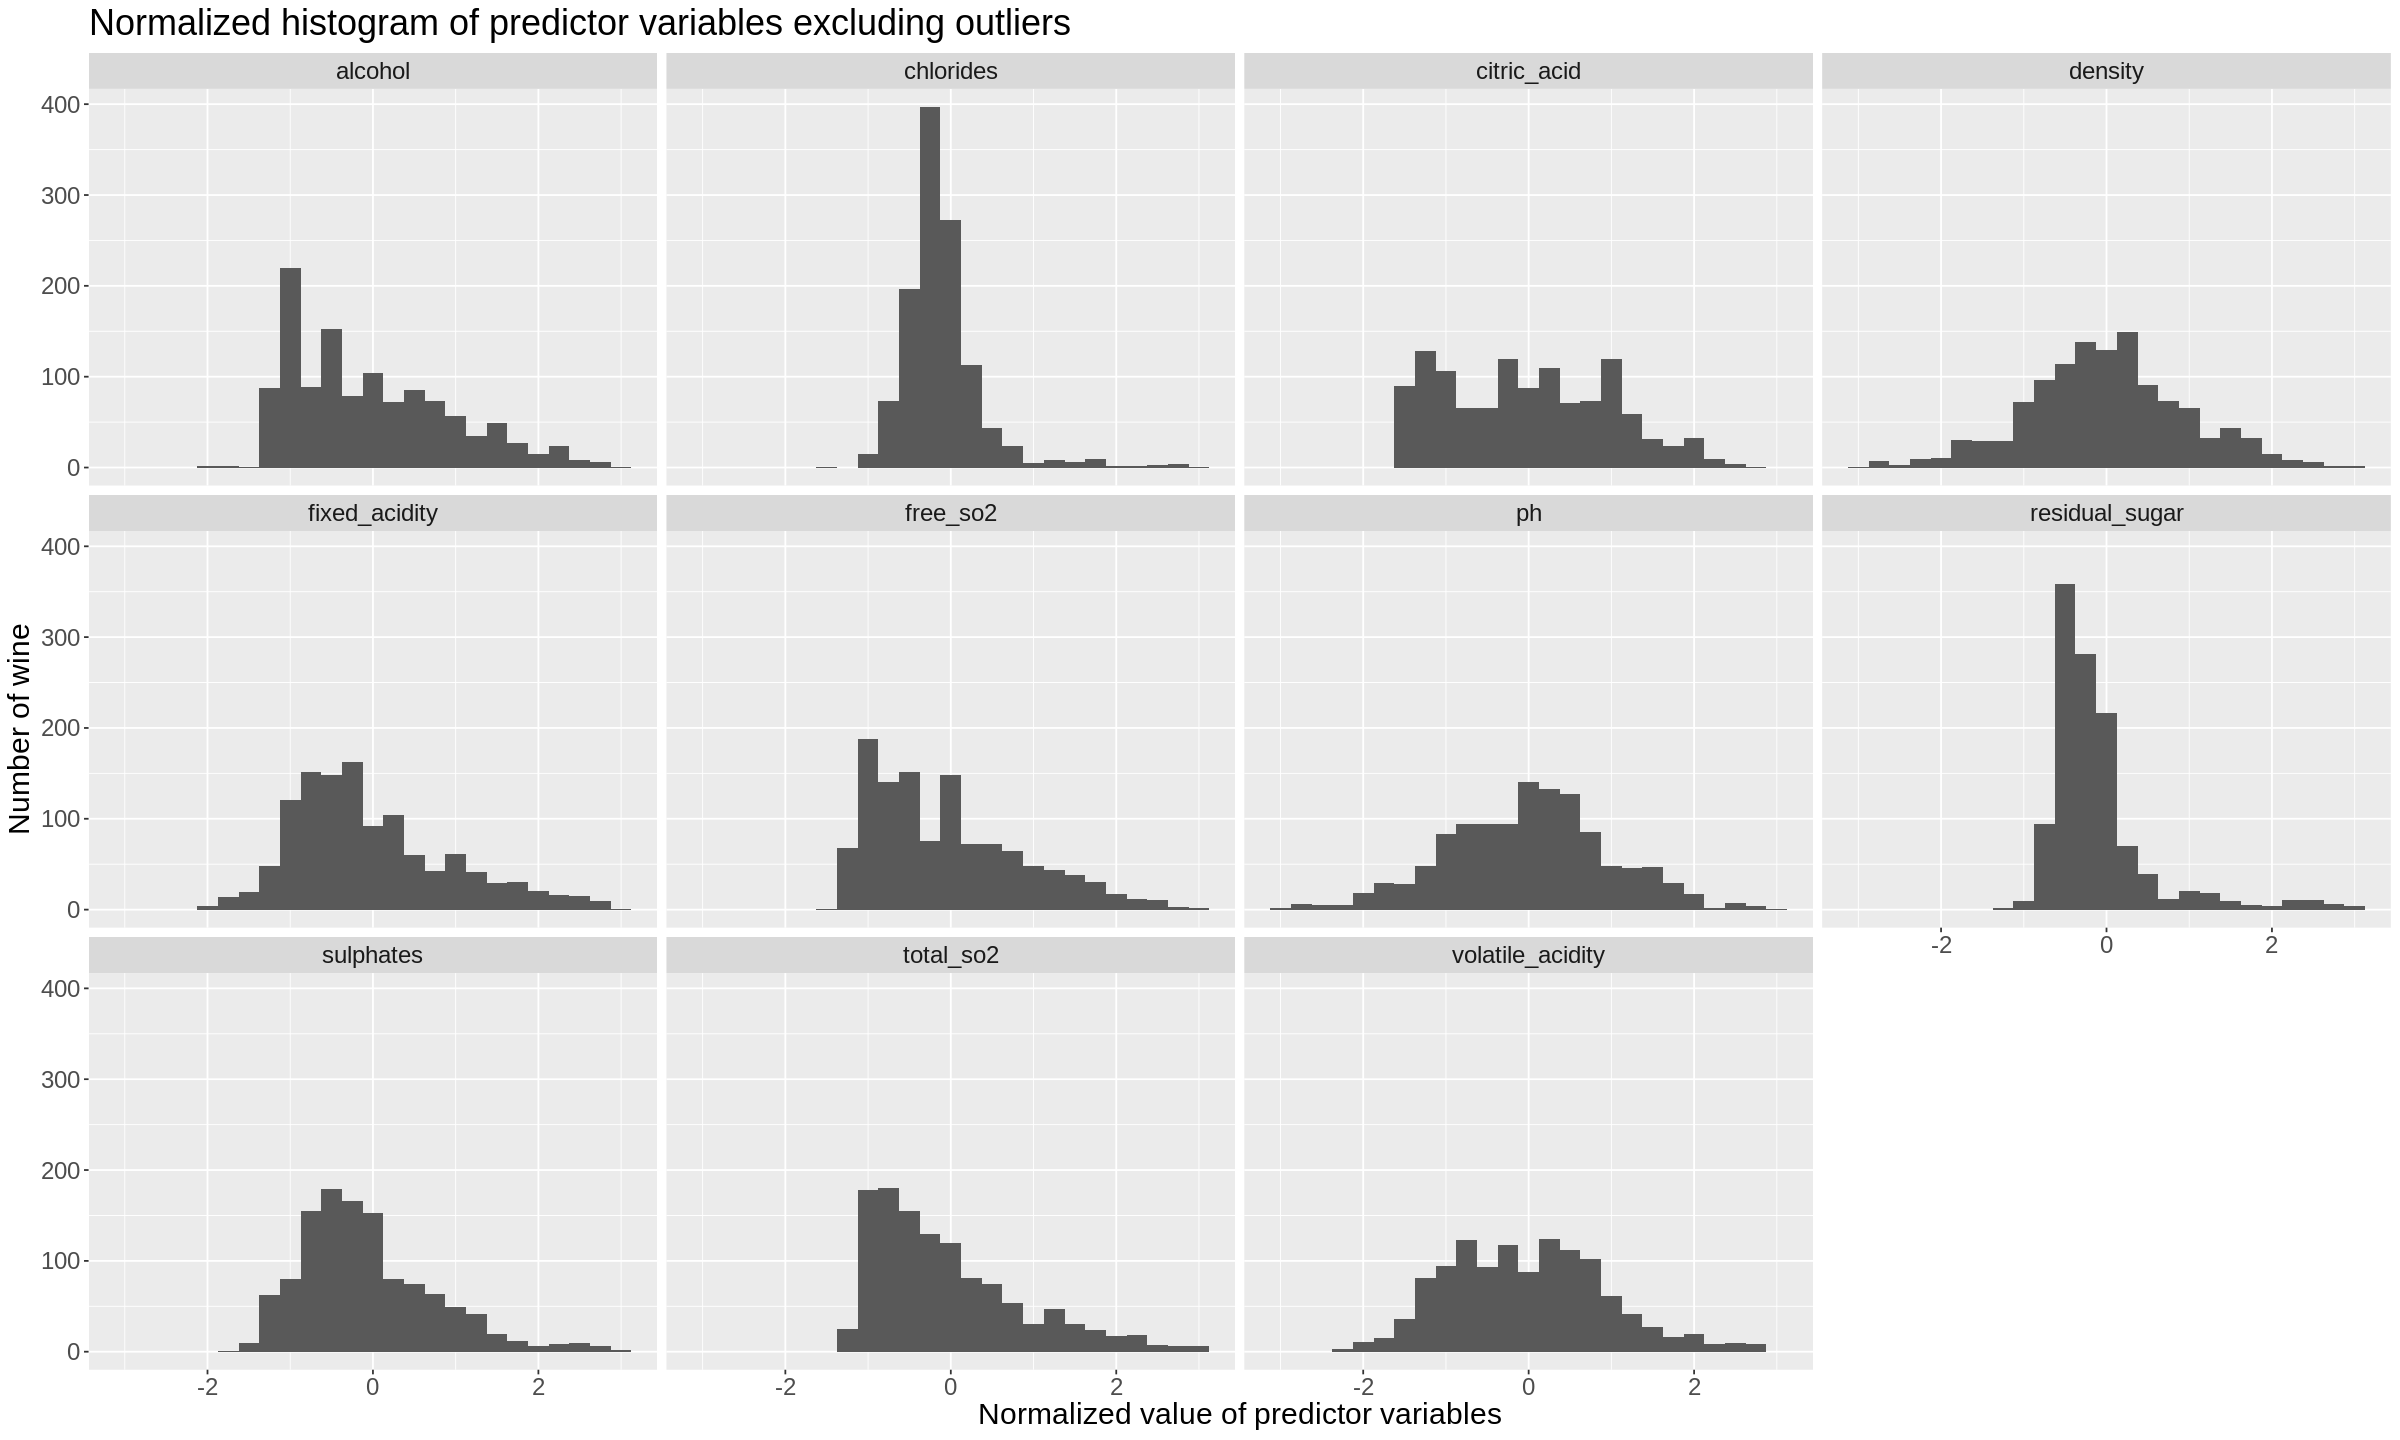

In [128]:
options(repr.plot.width = 20, repr.plot.height = 12)

red_training_normalized <- red_training_data |>
    select(-quality) |>
    scale() |>
    as.data.frame()

red_training_normalized_longer <- pivot_longer(red_normalized, cols = fixed_acidity:alcohol, names_to = "variable", values_to = "value")

# define binwidth constant
PREDICTOR_BINWIDTH <- 0.25

# code to plot without excluding outliers
# red_predictor_histogram <- ggplot(red_training_normalized_longer, aes(x = value)) + 
#     geom_histogram(binwidth = PREDICTOR_BINWIDTH) +
#     facet_grid(rows = vars(variable)) +
#     ggtitle("Normalized histogram of predictor variables") +
#     labs(x = "Normalized value of predictor variables", y = "Number of wine") + 
#     theme(text = element_text(size = 18))

# keep values within 3 standard deviations
red_training_normalized_longer_eo <- filter(red_normalized_longer, value < 3 & value > -3)

red_predictor_histogram_eo <- ggplot(red_training_normalized_longer_eo, aes(x = value)) + 
    geom_histogram(binwidth = PREDICTOR_BINWIDTH) +
    facet_wrap(vars(variable)) +
    ggtitle("Normalized histogram of predictor variables excluding outliers") +
    labs(x = "Normalized value of predictor variables", y = "Number of wine") + 
    theme(text = element_text(size = 18))

red_predictor_histogram_eo

From the second plot, it can be seen that most of the predictor variables tend to be positively skewed, most likely due to the fact that those variables can not have a negative value and are capped at a minimum of 0. An example is the `total_so2` variable, where the median is between z = -1 and 0 and is visibly skewed to the right. The `total_so2` variable is measured in mg/dm<sup>3</sup>, which does not allow for negative values and the minimum of ~6.0mg/dm<sup>3</sup> (seen in the statistics table) is relatively close to the lower limit of 0. On the other hand, the distribution of the `pH` variable appears relatively normal as its minimum and maximum values of ~2.7 and ~3.9 respectively does not approach the lower and upper limits of the pH scale, which is 0 and 14 respectively. 

Another notable observation is the different deviations, where some distributions are taller than others and more concentrated in the mean/median. A variable with a wider distribution may produce more distinguishable taste characteristics that may correlate with the perceived quality and thus affect the `quality` variable. It is also possible that the median of certain variables produce desirable taste characteristics, and those variables are prominent indicators of quality. However, these are preliminary analyses and mere speculations that aren't backed by any data or information.


Below is the third plot, which is just an example scatter plot with arbitrarily chosen predictor variables as the axes and the class variable as the color. The data used is not normalized for this plot and units are included.

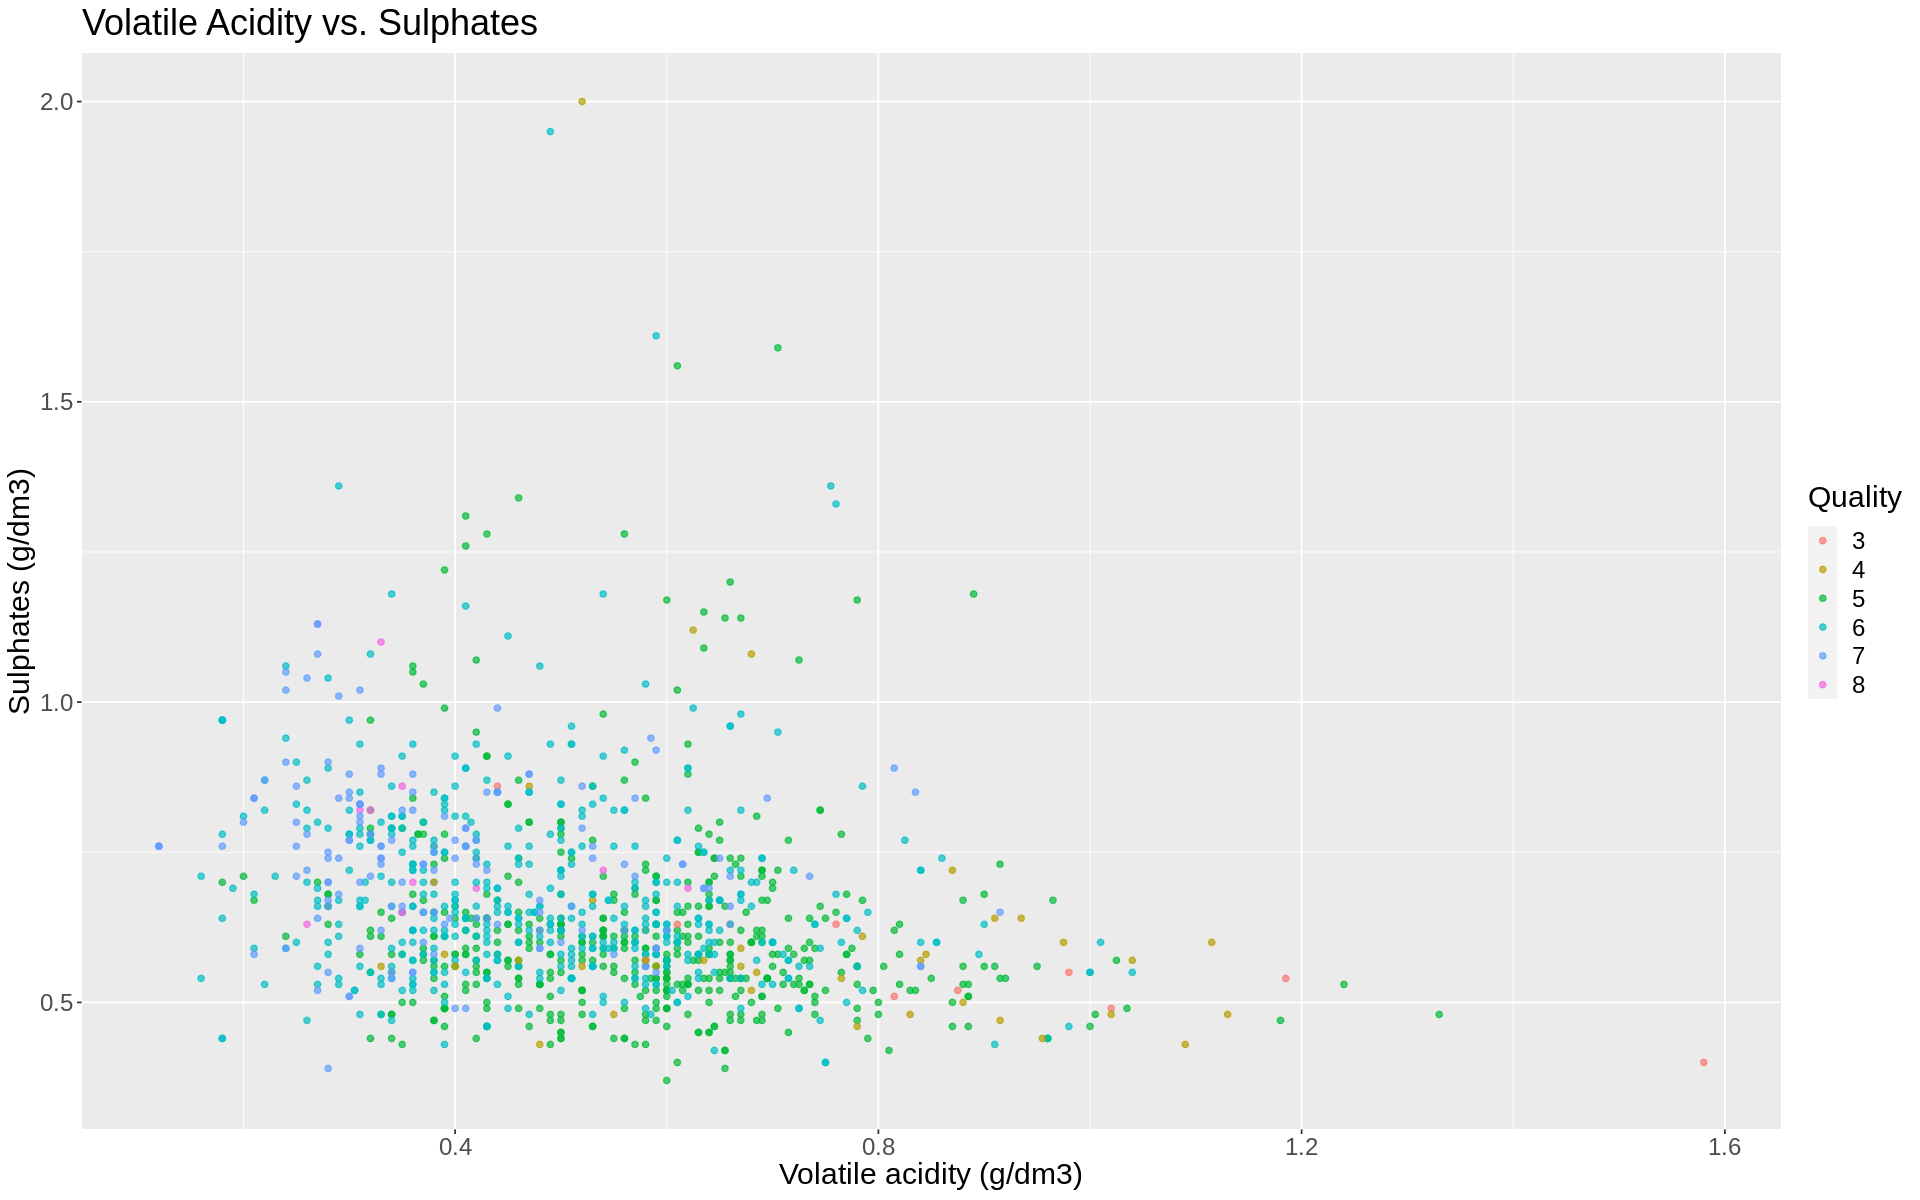

In [123]:
options(repr.plot.width = 16, repr.plot.height = 10)

red_predictor_scatter <- ggplot(red_training_data, aes(x = volatile_acidity, y = sulphates, color = quality)) + 
    geom_point(alpha = 0.7) +
    ggtitle("Volatile Acidity vs. Sulphates") +
    labs(x = "Volatile acidity (g/dm3)", y = "Sulphates (g/dm3)", color = "Quality") + 
    theme(text = element_text(size = 18))

red_predictor_scatter

Although only two predictor variables are chosen arbitrarily with `quality` plotted with color, there appears to be a correlation between the predictor variables and the quality variable; a higher level of sulphates and lower level of volatile acidity tends to be higher quality.

### Methods

We will choose residual suger, alcohol, total sulfur dioxide, chloride, volatile acidity and sulphates to conduct data analysis since these variables are related to tastes of wines. For example, residual suger affect sweetness of the wines. We will create scattor plot for each variables verses quality of the wine and draw regression lines for each plot. In this way, the plot can indicate the corelations of these variables.




### Expected outcomes and significance

We expect to find that a moderate balance of alcohol variables will lead to the highest quality rating of alcohol. Alcohol with extremely strong or weak variables will subsequently lead to a lower quality rating.

By determining what variables lead to a higher quality rating of alcohol, wine makers will be able to concoct a specific type of alcohol that they can assume will be successful without have to physically taste the wine.

This can also raise further questions of whether the features of wine that are correlated to a higher quality rating can be applied to other types of alcohol (eg. beer, tequila, vodka).